In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("exercise.csv")

In [3]:
calories = pd.read_csv("calories.csv")

In [5]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [9]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [7]:
df["calories"] = calories.drop("User_ID", axis=1)

In [8]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
df.drop("User_ID", axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [14]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
calories      0
dtype: int64

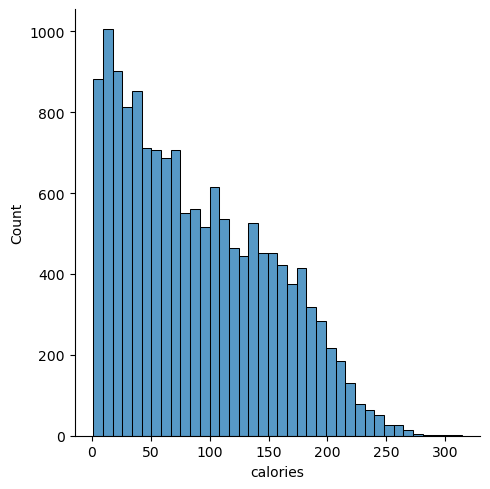

In [16]:
sns.displot(data=df, x="calories")

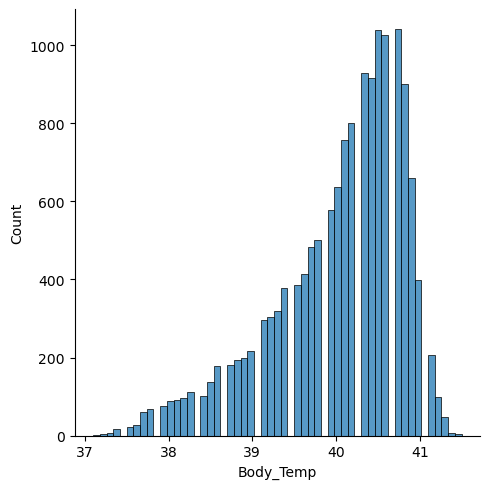

In [17]:
sns.displot(data=df, x="Body_Temp")

<Axes: xlabel='calories', ylabel='Duration'>

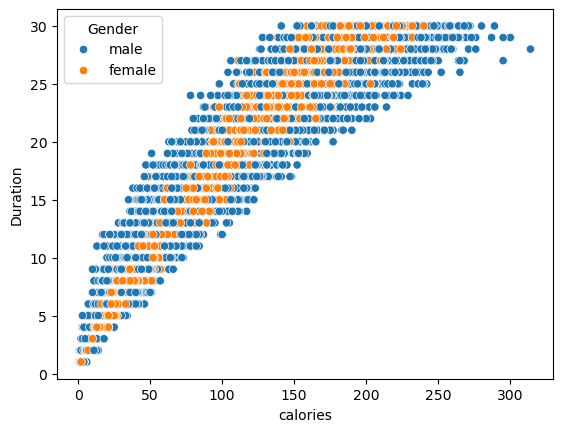

In [19]:
sns.scatterplot(data=df, x="calories", y="Duration", hue="Gender")

<Axes: xlabel='calories', ylabel='Body_Temp'>

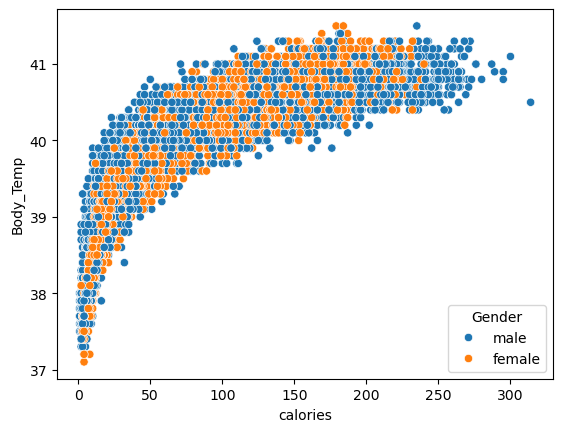

In [20]:
sns.scatterplot(data=df, x="calories", y="Body_Temp", hue="Gender")

<Axes: xlabel='Weight', ylabel='Height'>

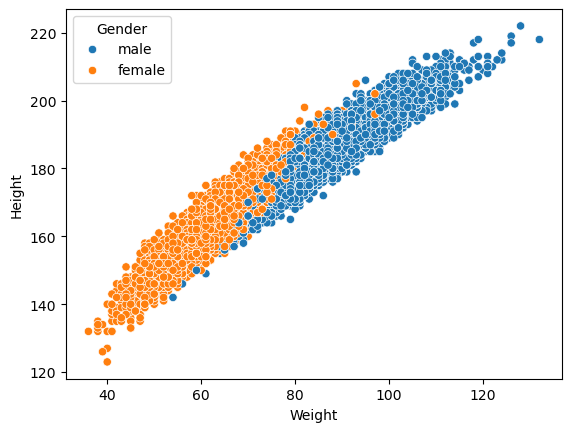

In [22]:
sns.scatterplot(data=df, x="Weight", y="Height", hue="Gender")

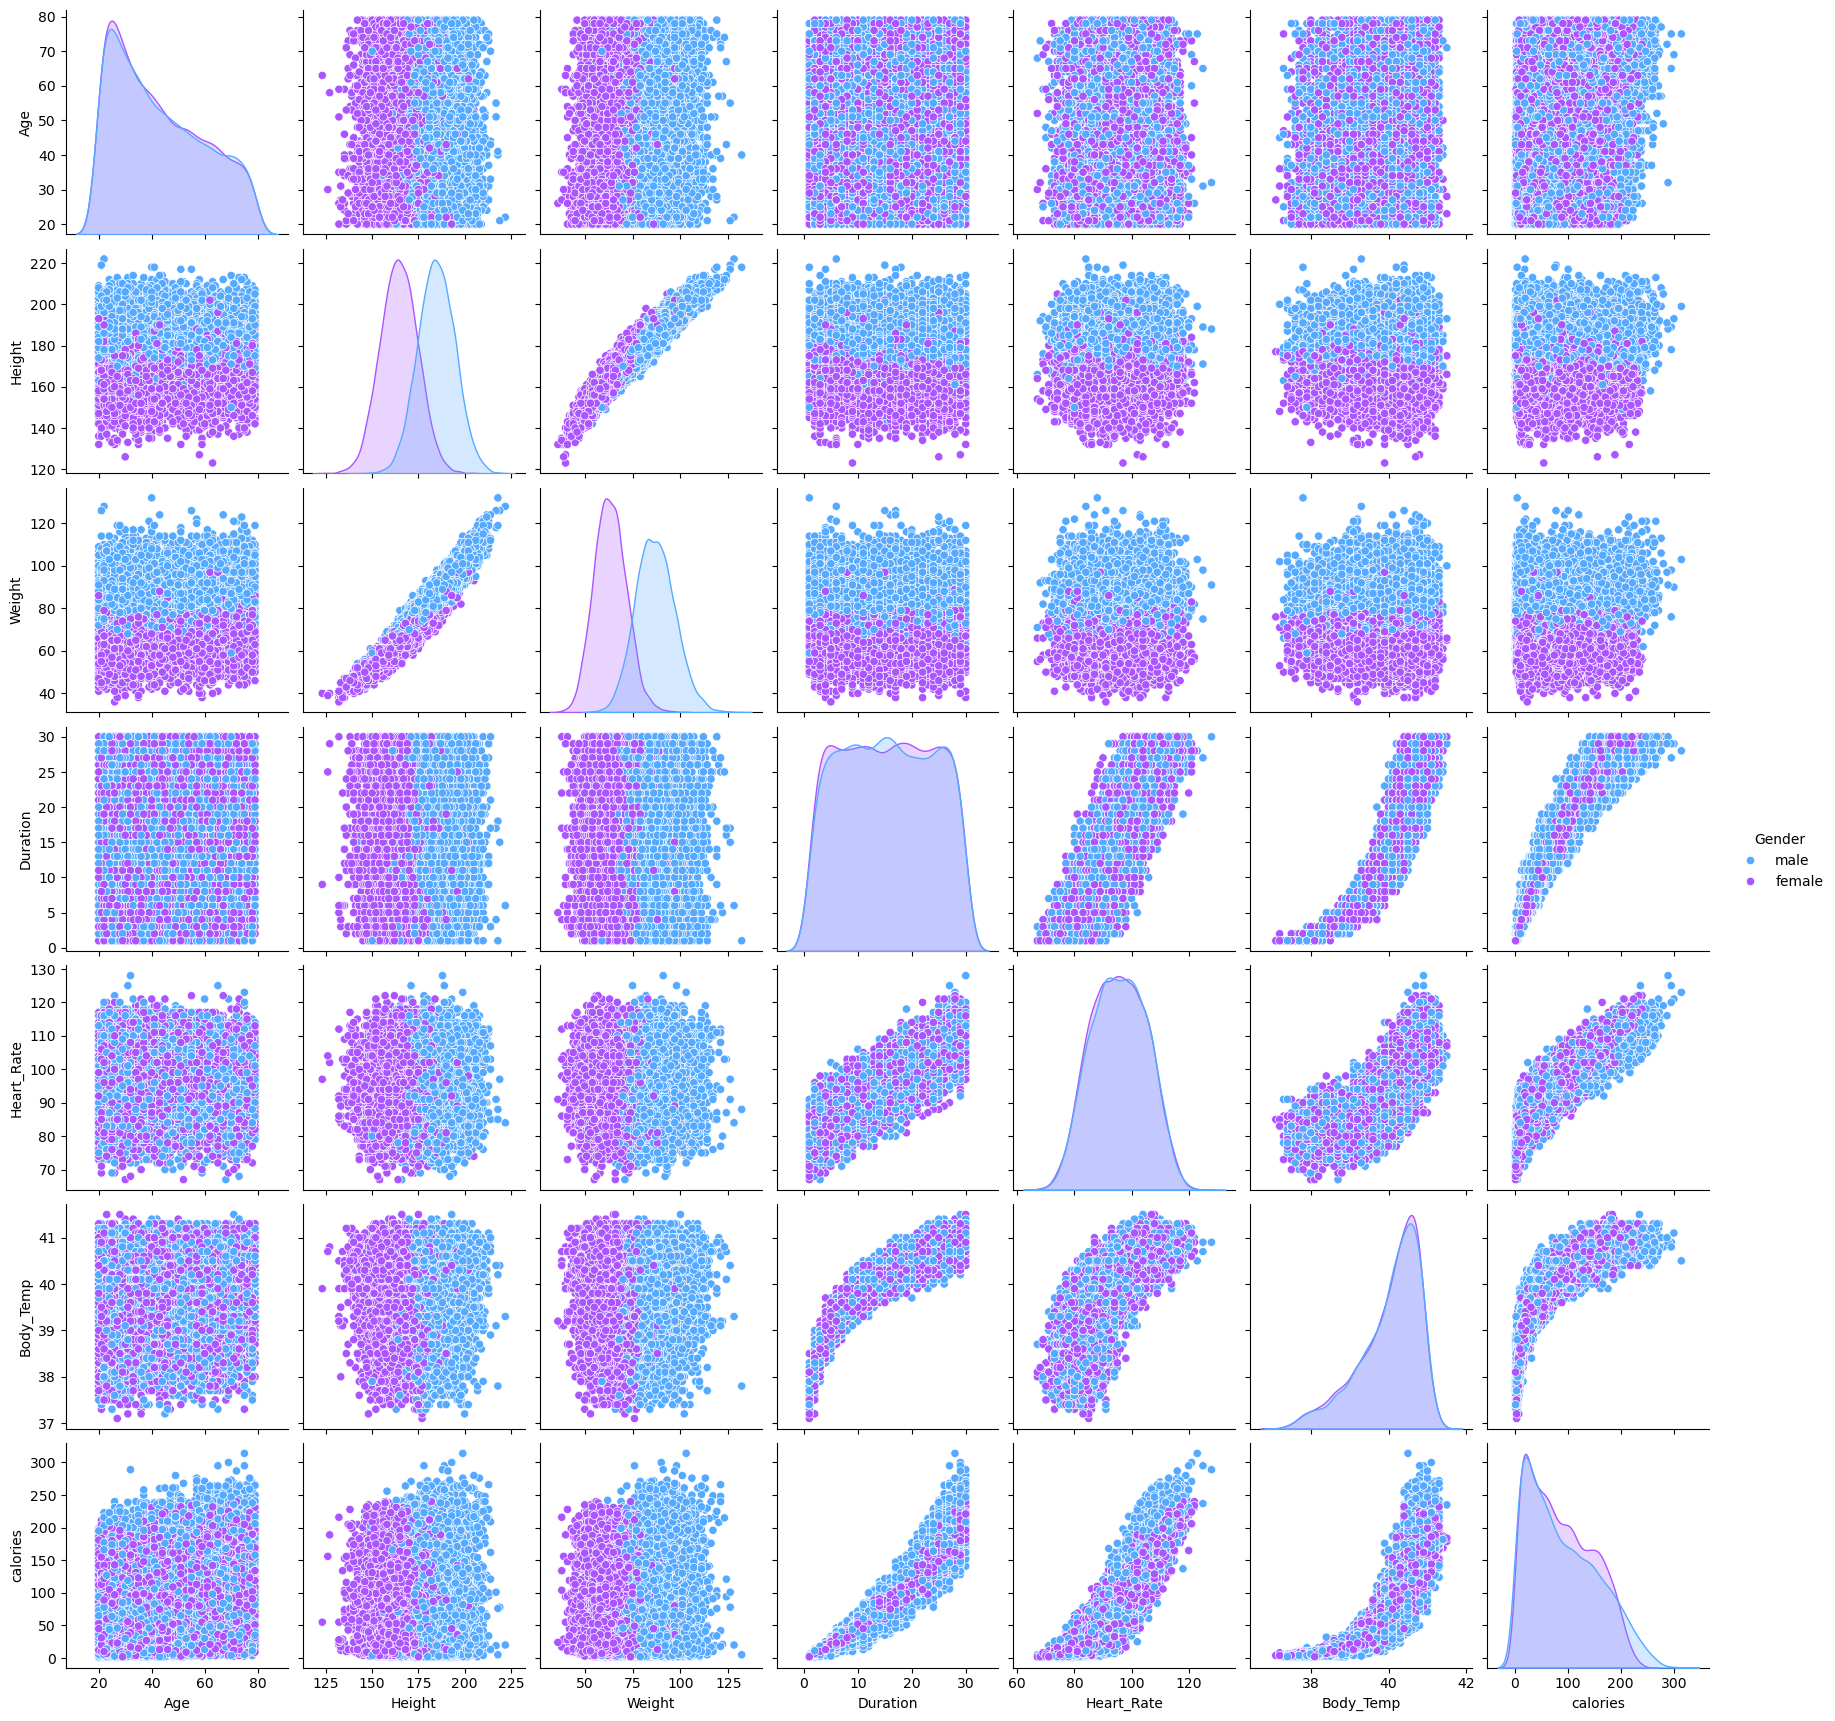

In [25]:
sns.pairplot(df,palette="cool",hue="Gender")

In [28]:
df["Gender"] = df["Gender"].map({"male": 1, "female":0})

In [29]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

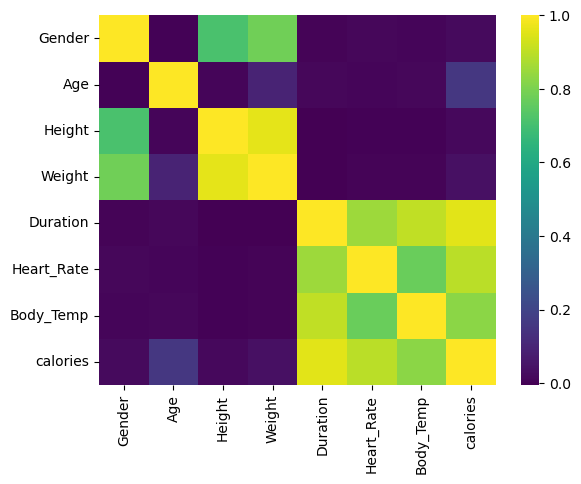

In [34]:
sns.heatmap(df.corr(), cmap="viridis")

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop("calories", axis = 1)
y = df["calories"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from xgboost import XGBRFRegressor

In [41]:
model = XGBRFRegressor()

In [42]:
model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [43]:
model.score(X_test, y_test)

0.9843777879682588

In [45]:
predictions = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
df['calories'].mean()

89.53953333333334

In [47]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

7.857619226390348


In [48]:
print(np.sqrt(r2_score(y_test, predictions)))

0.992158146652165


**LINEAR**

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linear = LinearRegression()

In [52]:
linear.fit(X_train, y_train)

LinearRegression()

In [55]:
linear.score(X_test, y_test)

0.9663701348612177

In [56]:
linear_predictions = linear.predict(X_test)

In [57]:
print(np.sqrt(mean_squared_error(y_test, linear_predictions)))

11.528751504699063


In [58]:
print(np.sqrt(r2_score(y_test, linear_predictions)))

0.9830412681374153
